# Relationship and effect of some variables of bike sharing system on trip duration
## by Mayssa Soussia 

## Investigation Overview


> In this investigation, I wanted to look to the characteristics of some categorical variable and their relationship to the feature of interest: duration of trip,  as well as the correlation with the numeric variable member_birth_year. The main focus was on member_gender, user_type, part_of_the_day and age. 


## Dataset Overview

> The data, after cleaning, consists of approximately 60600 records of the characteristics of bike sharing users, and attributes about their trips such as duration, start and end of time and station. 

In [27]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [28]:
# load in the dataset into a pandas dataframe
GoBike_df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [29]:
# drop nan values and convert columns to the right datatypes
GoBike_df  = GoBike_df.dropna() 

GoBike_df['start_time'] = pd.to_datetime(GoBike_df['start_time'])
GoBike_df['end_time'] = pd.to_datetime(GoBike_df['end_time'])
GoBike_df[['start_station_id','end_station_id', 'bike_id']] = GoBike_df[['start_station_id', 
                                                                          'end_station_id', 'bike_id']].astype(int)
GoBike_df[['user_type','member_gender','bike_share_for_all_trip']]= GoBike_df[['user_type','member_gender',
                                                                               'bike_share_for_all_trip']].astype('category')

## Distribution of Trip Duration 

> Duration_sec in the dataset take on a very large range of values, from about 61s at the lowest, to about 83200 at the highest. Plotted on a logarithmic scale, the distribution of trip duration follows a normal distribution. 


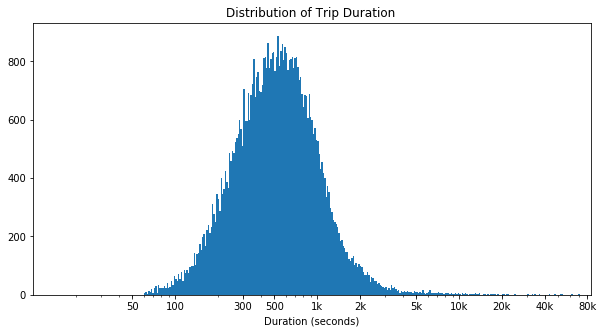

In [31]:
log_binsize = 0.01
bins = 10 ** np.arange(1, np.log10(GoBike_df['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = GoBike_df, x = 'duration_sec', bins = bins)
plt.title('Distribution of Trip Duration ')
plt.xlabel('Duration (seconds)')
plt.xscale('log')
plt.xticks([50, 100, 300, 500, 1e3, 2e3, 5e3, 1e4, 2e4, 4e4, 8e4],
           [50, 100,  300, 500, '1k', '2k', '5k', '10k', '20k', '40k','80k'])
plt.xlim([0, 85000])
plt.show()


## Distribution of User Type

User_type is a categorical variable that takes two values: subscriber and customer. 

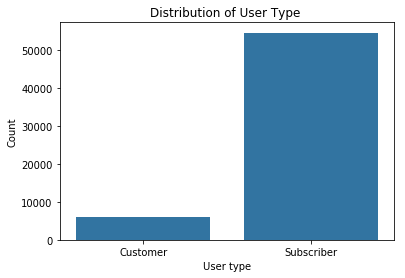

In [32]:
# plotting user_type distribution
base_color = sb.color_palette()[0]

fig = sb.countplot(data=GoBike_df, x='user_type', color=base_color);
plt.title('Distribution of User Type ')
plt.xlabel('User type')
plt.ylabel('Count')
plt.show()

## Distribution of Member Gender

Member_gender is a categorical variable that takes on three values: Male, female and other. 

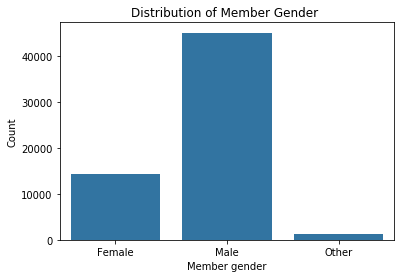

In [33]:
# plotting member_gender distribution
fig = sb.countplot(data=GoBike_df, x='member_gender', color=base_color);
plt.title('Distribution of Member Gender ')
plt.xlabel('Member gender')
plt.ylabel('Count')
plt.show()

## Distribution of Part of The Day

Part_of_the_day is a new generated column where values are: morning, afternoon, evening and night. The values were computed based on the hours extracted from start_time column of the trip. 

In [34]:
#Extract the hours from start_time column
hours = GoBike_df['start_time'].dt.hour

# create a list of our conditions
conditions = [
    (hours >= 5 ) & (hours < 12),
    (hours >= 12) & (hours < 17),
    (hours >= 17 ) & (hours < 21),
    (hours >= 21) | (hours <= 4),
    ]

# create a list of the values we want to assign for each condition
values = ['morning', 'afternoon', 'evening', 'night']

# create a new column and use np.select to assign values to it using our lists as arguments
GoBike_df['part_of_the_day'] = np.select(conditions, values)


In [35]:
# Set the new colum type to category
GoBike_df['part_of_the_day'] = GoBike_df['part_of_the_day'].astype('category')

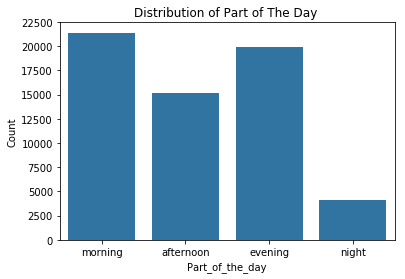

In [36]:
#Plot the distribution of the part_of_day_column 

gen_order= ['morning', 'afternoon', 'evening', 'night']

fig = sb.countplot(data=GoBike_df, x='part_of_the_day', color=base_color, order = gen_order);
plt.title('Distribution of Part of The Day ')
plt.xlabel('Part_of_the_day')
plt.ylabel('Count')
plt.show()

## Duration vs. Member birth year

Plotting price on a logarithmic scale and taking the cube root of carat (which is approximately proportional to the dimensions of the diamond) produces an approximately linear relationship. For carat weights above 1.5, there appears to be a price ceiling: based on the trend below 1.5 carats, we might expect some larger diamonds to take prices higher than \$20,000.

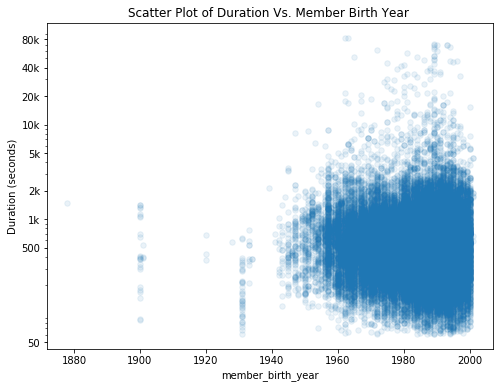

In [37]:
# Scatter plot of birth_year vs duration
plt.figure(figsize = [8, 6])
plt.scatter(data = GoBike_df, x = 'member_birth_year', y = 'duration_sec', s = 30 , alpha = 0.09, color = base_color) 
plt.title('Scatter Plot of Duration Vs. Member Birth Year ')
plt.xlabel('member_birth_year')
plt.yscale('log')
plt.yticks([50, 500, 1e3, 2e3, 5e3, 1e4, 2e4, 4e4, 8e4], [50, 500, '1k', '2k', '5k', '10k', '20k', '40k', '80k'])
plt.ylabel('Duration (seconds)')
plt.show()

## Duration by User Type and Part of The Day 

There is a slight difference in duration between user types where subscribers tend to have shorter trips in average than customers. In addition, subscribers are more active during afternoon and night where the corresponding violin plots for these times are wider as for the rest of the day (during morning and evning), all users tend to behave similarly, this can be expected as these times overlap with the start and end of work and studies.   

In [38]:
# compute the logarithm of duration 
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

GoBike_df['log_duration_sec'] = GoBike_df['duration_sec'].apply(log_trans)

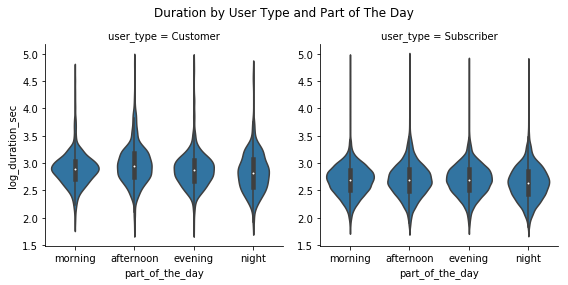

In [50]:
# plot duration, user_type and part_of_the_day
g = sb.FacetGrid(data = GoBike_df, col = 'user_type', size = 4)
g.map(sb.violinplot, 'part_of_the_day', 'log_duration_sec', order = gen_order)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Duration by User Type and Part of The Day"); 

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_Project_Bike_Sharing.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_Project_Bike_Sharing.ipynb to slides
[NbConvertApp] Writing 464072 bytes to Part_II_slide_Project_Bike_Sharing.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_Project_Bike_Sharing.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
